In [79]:
import pandas as pd
import numpy as np
import skbio
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import researchpy as rp
from matplotlib import rcParams
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
#from statsmodels.stats.multicomp import MultiComparison
#dunns
from itertools import combinations
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.libqsturng import psturng
import warnings

import plotly.express as px
import plotly.graph_objects as go
import os
import re
from plotly.subplots import make_subplots

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.api as sm

import statsmodels.api as sa
import scikit_posthocs as sp

from pingouin import kruskal

rcParams.update({'figure.autolayout': True})

In [80]:
date1 = '16.10.19'
date2 = '22.10.19'
finaldate = '16.10.19+22.10.19'

In [81]:
if not os.path.exists(f'../../../../data/plots/luminescence/{finaldate}'):
    os.mkdir(f'../../../../data/plots/luminescence/{finaldate}')

In [82]:
luminescence_raw_date1 = f'../../../../data/luminescence/to_be_sorted/{finaldate}/output_raw_{date1}.csv'
luminescence_raw_date2 = f'../../../../data/luminescence/to_be_sorted/{finaldate}/output_raw_{date2}.csv'

In [83]:
luminescence_raw_df_date1 = pd.read_csv(luminescence_raw_date1, header=0)
luminescence_raw_df_date2 = pd.read_csv(luminescence_raw_date2, header=0)

In [84]:
luminescence_raw_df_date1

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,date,nluc/fluc
0,A,1,Sample X1,163037,2821465,14+30+34,NaN,16.10.19,17.30567
1,B,1,Sample X2,522154,8276719,14+32+34,NaN,16.10.19,15.85111
2,C,1,Sample X3,229543,3736812,14+30+32+34,NaN,16.10.19,16.27936
3,D,1,Sample X4,202984,224602,16+33+34,NaN,16.10.19,1.10650
4,E,1,Sample X5,83536,71121,16+29+34,NaN,16.10.19,0.85138
...,...,...,...,...,...,...,...,...,...
63,C,9,Sample X65,21409,115484,25+29+34,NaN,16.10.19,5.39418
64,D,9,Sample X66,108503,564319,25+27+34,NaN,16.10.19,5.20095
65,E,9,Sample X67,129959,1076317,25+30+27+29+34,NaN,16.10.19,8.28197
66,F,9,Sample X68,20084,748729,35 + 34,NaN,16.10.19,37.27987


In [85]:
luminescence_raw_df_date2

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,date,nluc/fluc
0,A,1,Sample X1,127009,1993858,14+30+34,NaN,22.10.19,15.69856
1,B,1,Sample X2,239470,3084368,14+32+34,NaN,22.10.19,12.87998
2,C,1,Sample X3,232303,2786576,14+30+32+34,NaN,22.10.19,11.99544
3,D,1,Sample X4,47753,625718,14+34,NaN,22.10.19,13.10322
4,E,1,Sample X5,196545,121874,16+33+34,NaN,22.10.19,0.62008
...,...,...,...,...,...,...,...,...,...
86,C,12,Sample X89,133673,1252893,25+30+27+29+34,NaN,22.10.19,9.37282
87,D,12,Sample X90,111264,82268,25+34,NaN,22.10.19,0.73939
88,E,12,Sample X91,96702,705740,25+27+29+34,NaN,22.10.19,7.29809
89,F,12,Sample X92,37856,2003425,35 + 34,NaN,22.10.19,52.92226


In [86]:
#add promoter names column
luminescence_raw_df_date1['Promoter'] = luminescence_raw_df_date1.name 

In [87]:
# luminescence_raw_df.loc[luminescence_raw_df.name == '71 + 72', 'Promoter'] = 'UBQ10'
# luminescence_raw_df.loc[luminescence_raw_df.name == '71+72', 'Promoter'] = 'UBQ10'
# luminescence_raw_df.loc[luminescence_raw_df.name == '25+72', 'Promoter'] = 'NIR1'
# luminescence_raw_df.loc[luminescence_raw_df.name == '35+72', 'Promoter'] = 'NOS'
# luminescence_raw_df.loc[luminescence_raw_df.name == '36+72', 'Promoter'] = 'STAP4'
# luminescence_raw_df.loc[luminescence_raw_df.name == '92+72', 'Promoter'] = 'NRP'
# luminescence_raw_df.loc[luminescence_raw_df.name == '92+29+72', 'Promoter'] = 'NRP+NLP7_TF'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '25 + 34', 'Promoter'] = 'NIR1(1000bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '35 + 34', 'Promoter'] = 'NOS'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '36 + 34', 'Promoter'] = 'STAP4'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '70 + 34', 'Promoter'] = '35S'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '14 + 34', 'Promoter'] = 'ANAC032(1000bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '13 + 34', 'Promoter'] = 'ANAC032(500bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '15 + 34', 'Promoter'] = 'ANR1(500bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '16 + 34', 'Promoter'] = 'ANR1(1000bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '17 + 34', 'Promoter'] = 'ARF18(500bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '18 + 34', 'Promoter'] = 'ARF18(1000bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '21 + 34', 'Promoter'] = 'DREB26(500bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '22 + 34', 'Promoter'] = 'DREB26(1000bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '23 + 34', 'Promoter'] = 'NLP7(500bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '24 + 34', 'Promoter'] = 'NLP7(1000bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '14+30+34', 'Promoter'] = 'ANAC032)'

luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name.str.match(r'(^14.*)')==True, 'Promoter'] = 'ANAC032'
luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name.str.match(r'(^16.*)')==True, 'Promoter'] = 'ANR1'
luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name.str.match(r'(^18.*)')==True, 'Promoter'] = 'ARF18'
luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name.str.match(r'(^20.*)')==True, 'Promoter'] = 'NLP6'
luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name.str.match(r'(^22.*)')==True, 'Promoter'] = 'DREB26'
luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name.str.match(r'(^24.*)')==True, 'Promoter'] = 'NLP7'
luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name.str.match(r'(^25.*)')==True, 'Promoter'] = 'NIR1(1000bp)'
luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name.str.match(r'(^35.*)')==True, 'Promoter'] = 'NOS'
luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name.str.match(r'(^36.*)')==True, 'Promoter'] = 'STAP4'
luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name.str.match(r'(^70.*)')==True, 'Promoter'] = '35S'

#luminescence_raw_df.loc[luminescence_raw_df.name == '71 + 34', 'Promoter'] = 'UBQ10:LucN/35S:LucF'

In [88]:
def add_promoter_column(df,promoter_number,promoter):
    df.loc[df.name.str.match(fr'(^{promoter_number}.*)')==True, 'Promoter'] = promoter
    

In [89]:
#add TF coexpression column
def add_tf_column(df, TF_number, TF):
    """function to add TF added column based on an input df, a TF_number and a TF name"""
    df.loc[df.name.str.contains(fr'.*{TF_number}.*')&df.TF_added.isnull()==True, 'TF_added'] = TF
    for index, value in df.loc[df.name.str.contains(fr'.*{TF_number}.*')&df.TF_added.notnull()].TF_added.items():
        if re.match(fr'.*{TF}.*', value):
            pass
        else:
            df.iloc[index, df.columns.get_loc('TF_added')] = f'{value}+{TF}'


In [90]:
#divide by NOS calibrator (mean nos-LucN/35SLucF luminescence)
def batch_correction(df,calibrator_promoter_name):
   #print(df[df.Promoter==calibrator_promoter_name])
    calibrator = df[df.Promoter==calibrator_promoter_name]
    calibrator_mean = calibrator['nluc/fluc'].mean(axis=0)
    df['corrected_luminescence'] = df['nluc/fluc']/calibrator_mean*100 

In [91]:
#add promoters to date1 df
add_promoter_column(luminescence_raw_df_date1, '14', 'ANAC032')
add_promoter_column(luminescence_raw_df_date1, '16', 'ANR1')
add_promoter_column(luminescence_raw_df_date1, '18', 'ARF18')
add_promoter_column(luminescence_raw_df_date1, '20', 'NLP6')
add_promoter_column(luminescence_raw_df_date1, '22', 'DREB26')
add_promoter_column(luminescence_raw_df_date1, '24', 'NLP7')
add_promoter_column(luminescence_raw_df_date1, '25', 'NIR1')
add_promoter_column(luminescence_raw_df_date1, '35', 'NOS')
add_promoter_column(luminescence_raw_df_date1, '36', 'STAP4')
add_promoter_column(luminescence_raw_df_date1, '70', '35S')

In [92]:
#add promoters to date2 df
add_promoter_column(luminescence_raw_df_date2, '14', 'ANAC032')
add_promoter_column(luminescence_raw_df_date2, '16', 'ANR1')
add_promoter_column(luminescence_raw_df_date2, '18', 'ARF18')
add_promoter_column(luminescence_raw_df_date2, '20', 'NLP6')
add_promoter_column(luminescence_raw_df_date2, '22', 'DREB26')
add_promoter_column(luminescence_raw_df_date2, '24', 'NLP7')
add_promoter_column(luminescence_raw_df_date2, '25', 'NIR1')
add_promoter_column(luminescence_raw_df_date2, '35', 'NOS')
add_promoter_column(luminescence_raw_df_date2, '36', 'STAP4')
add_promoter_column(luminescence_raw_df_date2, '70', '35S')

In [120]:
#add TF column to date1 df
luminescence_raw_df_date1['TF_added'] = np.nan
add_tf_column(luminescence_raw_df_date1,'27','NLP6')
add_tf_column(luminescence_raw_df_date1,'29','NLP7')
add_tf_column(luminescence_raw_df_date1,'30','DREB26')
add_tf_column(luminescence_raw_df_date1,'31','ANAC032')
add_tf_column(luminescence_raw_df_date1,'32','ARF18')
add_tf_column(luminescence_raw_df_date1,'33','ANR1')

In [121]:
#add TF column to date2 df
luminescence_raw_df_date2['TF_added'] = np.nan
add_tf_column(luminescence_raw_df_date2,'27','NLP6')
add_tf_column(luminescence_raw_df_date2,'29','NLP7')
add_tf_column(luminescence_raw_df_date2,'30','DREB26')
add_tf_column(luminescence_raw_df_date2,'31','ANAC032')
add_tf_column(luminescence_raw_df_date2,'32','ARF18')
add_tf_column(luminescence_raw_df_date2,'33','ANR1')

In [122]:
#divide by NOS calibrator (mean nos-LucN/35SLucF luminescence)
batch_correction(luminescence_raw_df_date1, 'NOS')
batch_correction(luminescence_raw_df_date2, 'NOS')

In [123]:
luminescence_raw_df_date1

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,date,nluc/fluc,Promoter,TF_added,corrected_luminescence
0,A,1,Sample X1,163037,2821465,14+30+34,NaN,16.10.19,17.30567,ANAC032,DREB26,30.180639
1,B,1,Sample X2,522154,8276719,14+32+34,NaN,16.10.19,15.85111,ANAC032,ARF18,27.643924
2,C,1,Sample X3,229543,3736812,14+30+32+34,NaN,16.10.19,16.27936,ANAC032,DREB26+ARF18,28.390781
3,D,1,Sample X4,202984,224602,16+33+34,NaN,16.10.19,1.10650,ANR1,ANR1,1.929707
4,E,1,Sample X5,83536,71121,16+29+34,NaN,16.10.19,0.85138,ANR1,NLP7,1.484785
...,...,...,...,...,...,...,...,...,...,...,...,...
63,C,9,Sample X65,21409,115484,25+29+34,NaN,16.10.19,5.39418,NIR1,NLP7,9.407310
64,D,9,Sample X66,108503,564319,25+27+34,NaN,16.10.19,5.20095,NIR1,NLP6,9.070322
65,E,9,Sample X67,129959,1076317,25+30+27+29+34,NaN,16.10.19,8.28197,NIR1,NLP6+NLP7+DREB26,14.443541
66,F,9,Sample X68,20084,748729,35 + 34,NaN,16.10.19,37.27987,NOS,NaN,65.015125


In [124]:
#merge the dfs with different dates
luminescence_raw_df = pd.concat([luminescence_raw_df_date1,luminescence_raw_df_date2],ignore_index=True)
luminescence_raw_df

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,date,nluc/fluc,Promoter,TF_added,corrected_luminescence
0,A,1,Sample X1,163037,2821465,14+30+34,NaN,16.10.19,17.30567,ANAC032,DREB26,30.180639
1,B,1,Sample X2,522154,8276719,14+32+34,NaN,16.10.19,15.85111,ANAC032,ARF18,27.643924
2,C,1,Sample X3,229543,3736812,14+30+32+34,NaN,16.10.19,16.27936,ANAC032,DREB26+ARF18,28.390781
3,D,1,Sample X4,202984,224602,16+33+34,NaN,16.10.19,1.10650,ANR1,ANR1,1.929707
4,E,1,Sample X5,83536,71121,16+29+34,NaN,16.10.19,0.85138,ANR1,NLP7,1.484785
...,...,...,...,...,...,...,...,...,...,...,...,...
154,C,12,Sample X89,133673,1252893,25+30+27+29+34,NaN,22.10.19,9.37282,NIR1,NLP6+NLP7+DREB26,20.571725
155,D,12,Sample X90,111264,82268,25+34,NaN,22.10.19,0.73939,NIR1,NaN,1.622834
156,E,12,Sample X91,96702,705740,25+27+29+34,NaN,22.10.19,7.29809,NIR1,NLP6+NLP7,16.018050
157,F,12,Sample X92,37856,2003425,35 + 34,NaN,22.10.19,52.92226,NOS,NaN,116.155241


In [125]:
#Change TF_added NaN values to none
luminescence_raw_df.loc[luminescence_raw_df.TF_added.isnull()==True, 'TF_added'] = 'No TF'

In [126]:
#sort rows by the custom promoter order I want so plots are in the correct order
luminescence_raw_df.Promoter = pd.Categorical(luminescence_raw_df.Promoter,
                                              ['NOS','STAP4','ANAC032','ANR1','ARF18','NLP6', 'NLP7', 'DREB26', 'NIR1'])
luminescence_raw_df = luminescence_raw_df.sort_values("Promoter")

In [99]:
# #set style to ticks
# sns.set(style="ticks", color_codes=True)

In [100]:
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly import tools

# trace1 = Bar(
#     x=['giraffes', 'orangutans', 'monkeys'],
#     y=[20, 14, 23],
#     name='SF Zoo'
# )
# trace2 = Bar(
#     x=['giraffes', 'orangutans', 'monkeys'],
#     y=[12, 18, 29],
#     name='LA Zoo'
# )
# trace3 = Scatter(
#   x=['giraffes', 'orangutans', 'monkeys']
#   ,y=[33,20,17]
#   ,name='subplots ftw'
#   )


# fig = tools.make_subplots(rows=2, cols=1, shared_xaxes=True)

# fig.append_trace(trace3, 1,1)
# fig.append_trace(trace1, 2, 1)
# fig.append_trace(trace2,2,1)


# fig['layout'].update(height=600, width=600)
# iplot(fig)

In [101]:
# # df = luminescence_raw_df.sort_values("Promoter")
# fig = make_subplots(rows=1, cols=2,shared_xaxes=True)
# trace1 = px.bar(df, y=df[df.Promoter=='NOS'].corrected_luminescence, x=df[df.Promoter=='NOS'].Promoter)
# fig.append_trace(trace1,1, 1)
# fig['layout'].update(height=600, width=600)

In [102]:
# df = luminescence_raw_df.sort_values("Promoter")
# trace1 = px.bar(df, y=df[df.Promoter=='NOS'].corrected_luminescence, x=df[df.Promoter=='NOS'].Promoter)
# fig.add_trace(trace1.data[0])
# fig['layout'].update(height=600, width=600)
# fig.show()

In [103]:
# #layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)' )

# fig = px.bar(luminescence_raw_df.sort_values("Promoter"), y="corrected_luminescence",barmode='group', x="Promoter", color="TF_added",  hover_data=luminescence_raw_df.columns) #points="all"

# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
# fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
# fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside", title_text='Mean_luminescence')
# #write to file static image and interactive one
# #fig.write_image(f'../../../../data/plots/luminescence/{date}/violin23.9.19.pdf')
# #fig.write_html(f'../../../../data/plots/luminescence/{date}/violin23.9.19.html')

# fig.show()

In [104]:
# #layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)' )
# fig = px.violin(luminescence_raw_df.sort_values("Promoter"), y="corrected_luminescence", x="Promoter", color="TF_added", box=True, hover_data=luminescence_raw_df.columns) #points="all"

# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
# fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
# fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside", title_text='Mean_luminescence')
# #write to file static image and interactive one
# #fig.write_image(f'../../../../data/plots/luminescence/{date}/violin23.9.19.pdf')
# #fig.write_html(f'../../../../data/plots/luminescence/{date}/violin23.9.19.html')

# fig.show()

In [105]:

# fig = go.Figure()
# df = luminescence_raw_df.sort_values("Promoter")
# fig.add_trace(go.Violin(x=df['Promoter'][ df['condition'] == '10 mM KNO3 in W5' ],
#                         y=df['nluc/fluc'][ df['condition'] == '10 mM KNO3 in W5' ],
#                         legendgroup='10 mM KNO3 in W5', scalegroup='10 mM KNO3 in W5', name='10 mM KNO3 in W5',
#                         line_color='blue')
#              )
# fig.add_trace(go.Violin(x=df['Promoter'][ df['condition'] == 'W5' ],
#                         y=df['nluc/fluc'][ df['condition'] == 'W5' ],
#                         legendgroup='W5', scalegroup='W5', name='W5',
#                         line_color='orange')
#              )

# fig.update_traces(box_visible=True, meanline_visible=True)
# fig.update_layout(violinmode='group')
# fig.show()


In [106]:
# df = luminescence_raw_df.sort_values("Promoter")
# #set figure size

# sns.set(rc={'figure.figsize':(8,6)}, style="ticks", color_codes=True)
# #bar chart, 95% confidence intervals
# plot = sns.barplot(x="TF_added", y="corrected_luminescence",hue='Promoter',data=df, ci=95, capsize=0.1,errwidth=0.7,n_boot=10000,
#                    )
# plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
# #plt.legend(loc='upper right', borderaxespad=0.)
# plt.ylabel("Mean_luminescence") #.get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence.pdf', format='pdf')

In [107]:
# plot = sns.catplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, hue='condition', kind='violin',
#                    order=['NOS','STAP4','NIR1(1000bp)','ANAC032(1000bp)','ANR1(500bp)','ANR1(1000bp)', 'ARF18(500bp)','ARF18(1000bp)', 'DREB26(500bp)', 'DREB26(1000bp)','NLP7(500bp)', 'NLP7(1000bp)'])
# #plot points
# [plt.setp(ax.get_xticklabels(), rotation=45, ha='right') for ax in plot.axes.flat]

# #ax = sns.swarmplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, color=".25",
#              #      order=['NOS','STAP4','NIR1(1000bp)','ANAC032(1000bp)','ANR1(500bp)','ANR1(1000bp)', 'ARF18(500bp)','ARF18(1000bp)', 'DREB26(500bp)', 'DREB26(1000bp)','NLP7(500bp)', 'NLP7(1000bp)']).get_figure().savefig(f'../../../../data/plots/luminescence/{date}/luminescence_violin.pdf', format='pdf')

In [ ]:
luminescence_raw_df_renamed = luminescence_raw_df.copy()
luminescence_raw_df_renamed.gene_type.replace('DREB26+ARF18','+DREB26+ARF18', inplace=True)
luminescence_raw_df_renamed.gene_type.replace('ARF18','+ARF18', inplace=True)
luminescence_raw_df_renamed.gene_type.replace('randCont','random', inplace=True)


In [132]:
#get TF names
pd.Categorical(luminescence_raw_df.TF_added)
names = luminescence_raw_df.TF_added.unique()
#Change TF names to +TF
luminescence_raw_df_renamed = luminescence_raw_df.copy()
for TF in names:
    if TF != 'No TF':
        luminescence_raw_df_renamed.TF_added.replace(TF,f'+{TF}', inplace=True)
luminescence_raw_df = luminescence_raw_df_renamed

### get names of each TF_added for later

In [133]:
pd.Categorical(luminescence_raw_df.TF_added)
names = luminescence_raw_df.TF_added.unique()
for name in names:
    print(name)

No TF
+DREB26+ARF18
+ARF18
+DREB26
+NLP7
+ANR1
+ANAC032
+NLP6
+NLP6+NLP7+DREB26
+NLP6+NLP7


In [134]:
#get list of promoters
pd.Categorical(luminescence_raw_df.Promoter)
prom_names = luminescence_raw_df.Promoter.unique()
for name in prom_names:
    print(name)

NOS
STAP4
ANAC032
ANR1
ARF18
NLP6
NLP7
DREB26
NIR1


In [145]:
#create colours
from random import randint
color = []
n = len(names)
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))
print(color)


['#BB068F', '#4DDC35', '#5F4482', '#24448E', '#A6B97C', '#B2B003', '#5F9E77', '#E12F07', '#B1D61D', '#B2E098']


In [146]:
#make dictionary with TF_added names as key and the randomly generated colors as values
new_color = dict(zip(names, color))
new_color

{'No TF': '#BB068F',
 '+DREB26+ARF18': '#4DDC35',
 '+ARF18': '#5F4482',
 '+DREB26': '#24448E',
 '+NLP7': '#A6B97C',
 '+ANR1': '#B2B003',
 '+ANAC032': '#5F9E77',
 '+NLP6': '#E12F07',
 '+NLP6+NLP7+DREB26': '#B1D61D',
 '+NLP6+NLP7': '#B2E098'}

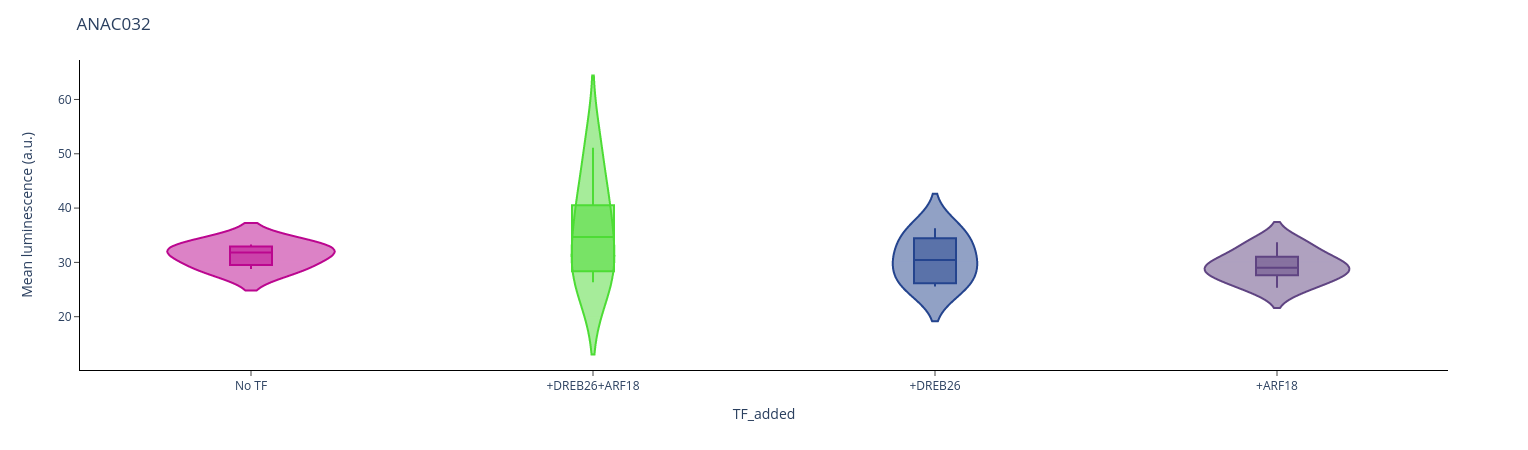

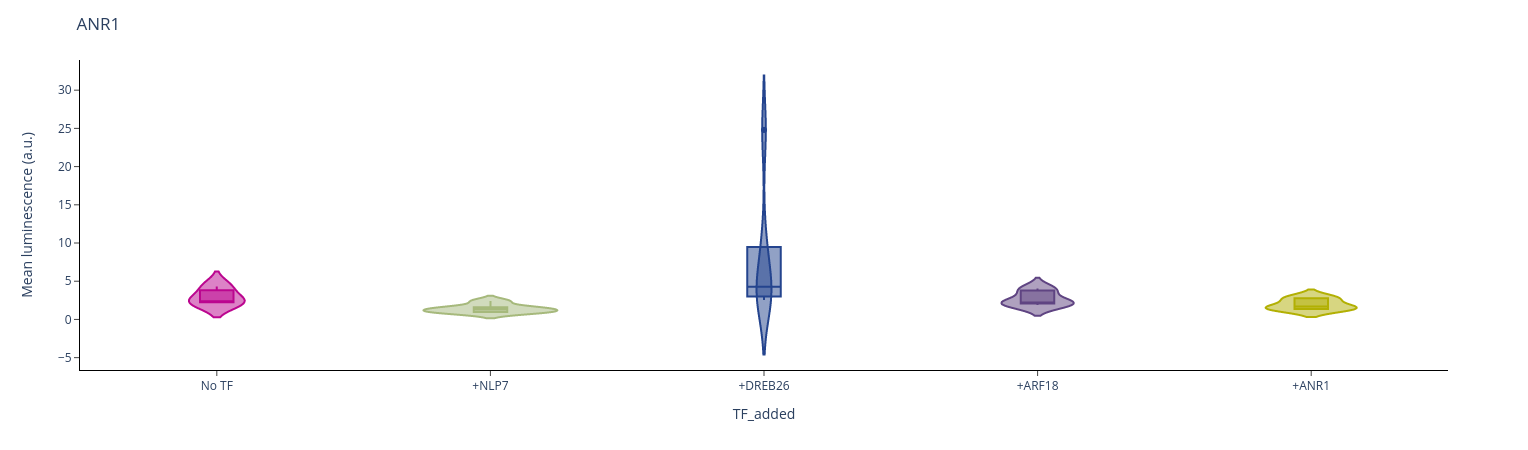

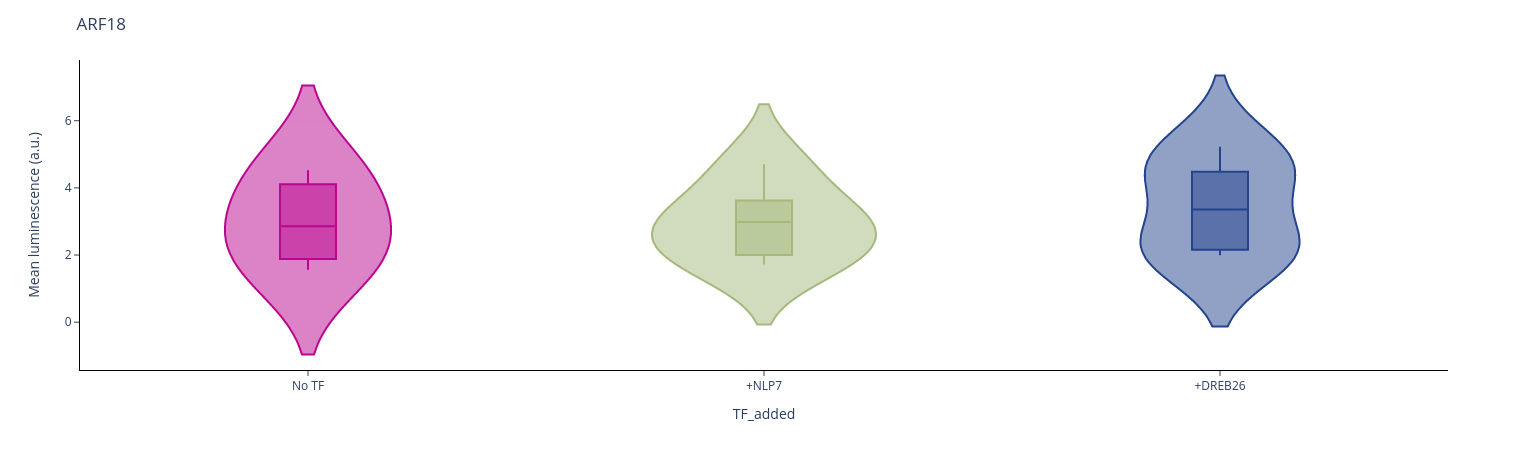

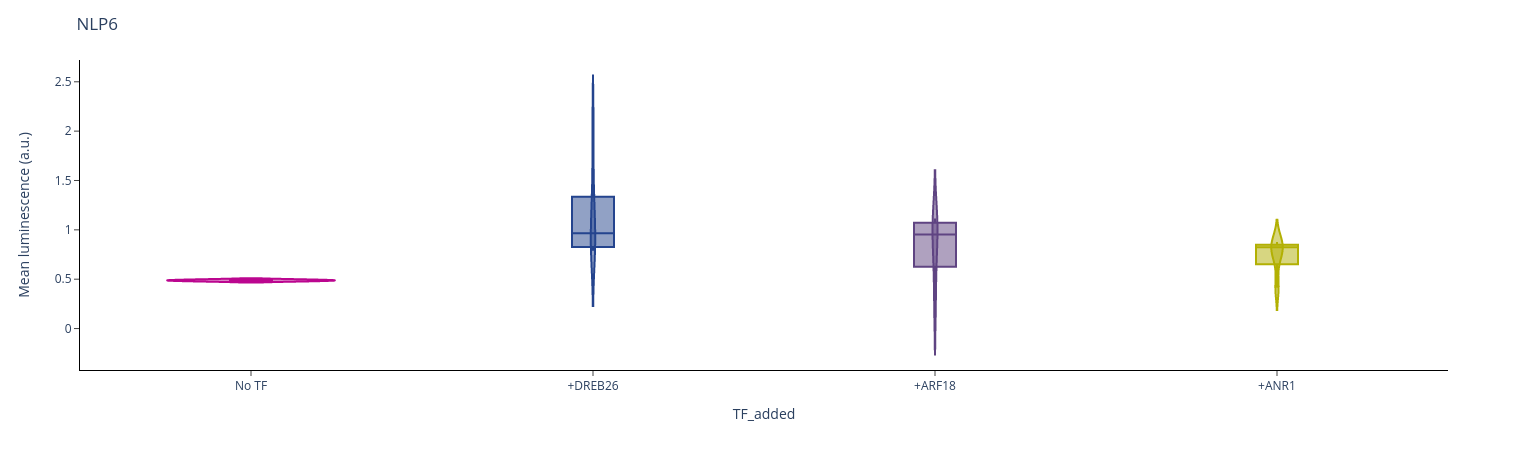

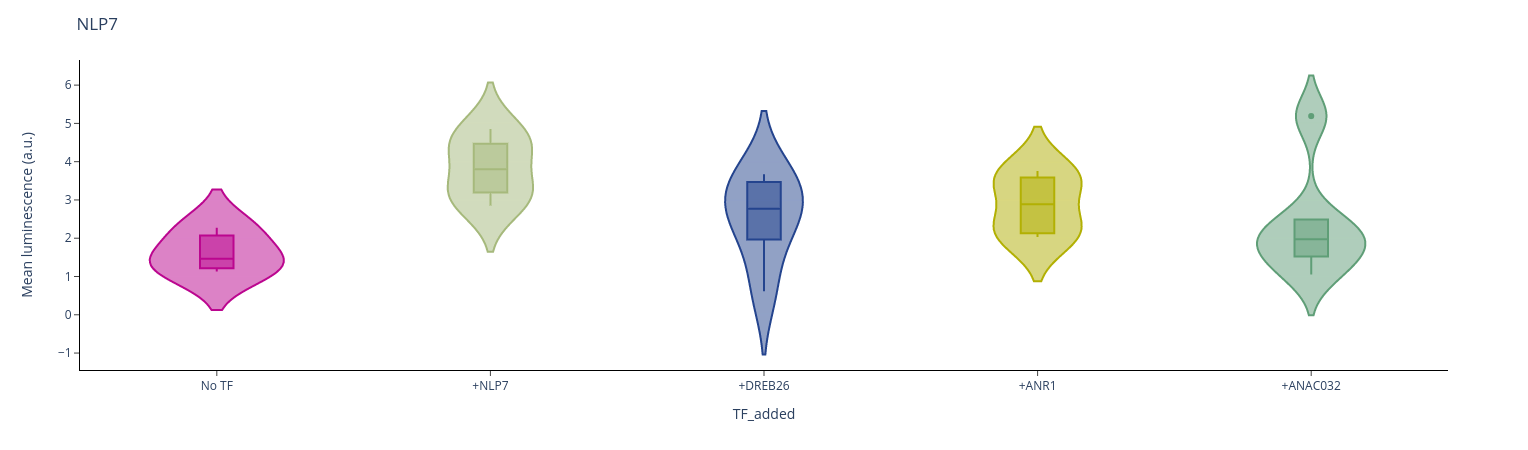

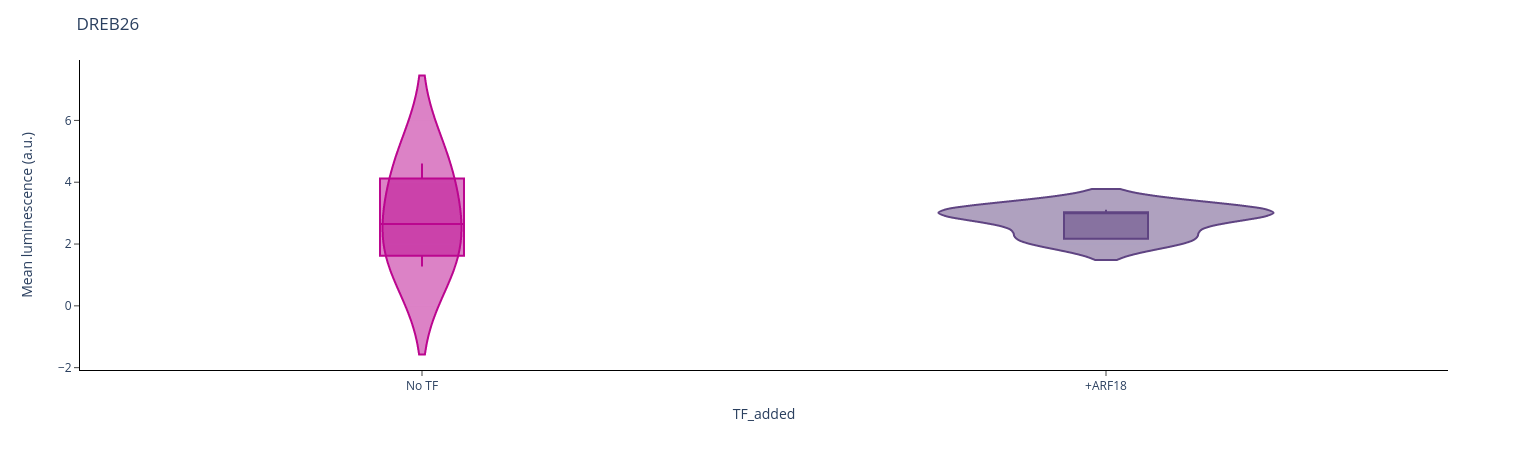

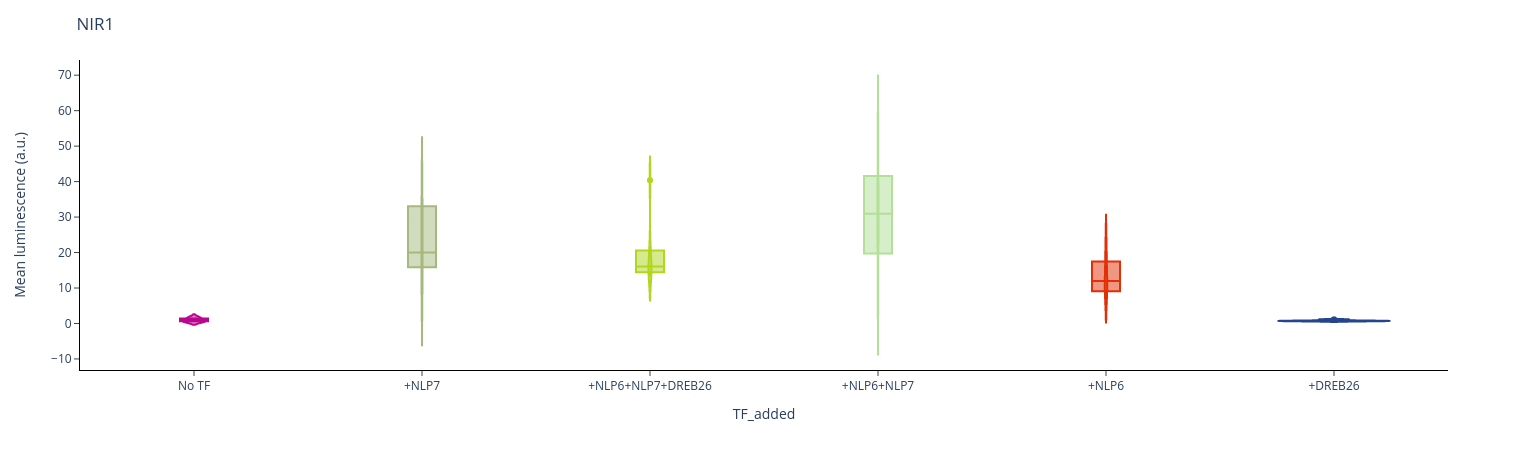

In [151]:
#layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)' )
#make graphs for each promoter
#color_discrete_map = {'red': 'red', 'blue': 'blue', 'orange': 'orange', 'purple':'purple','green':'green','yellow':'yellow','brown':'brown','black':'black'}


for prom in prom_names:
    if prom == 'NOS' or prom == 'STAP4':
        pass
    else:
        df = luminescence_raw_df[luminescence_raw_df.Promoter == prom].sort_values("TF_added", ascending=False)


        fig = px.violin(df, x='TF_added',
                                  y='corrected_luminescence', box=True,                       
                                color='TF_added', color_discrete_map=new_color,violinmode='overlay') #points="all"

        fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', title=prom,autosize=True)
        fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
        fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside", title_text='Mean luminescence (a.u.)')
        #hide legend
        fig.layout.update(showlegend=False)
        #write to file static image and interactive one
        fig.write_image(f'../../../../data/plots/luminescence/{finaldate}/violin{prom}.pdf', width=500, height=350, scale=5)
        fig.write_html(f'../../../../data/plots/luminescence/{finaldate}/violin{prom}.html')
        fig.show()

In [113]:
for TF in names:
    print(TF)

No TF
+NLP6


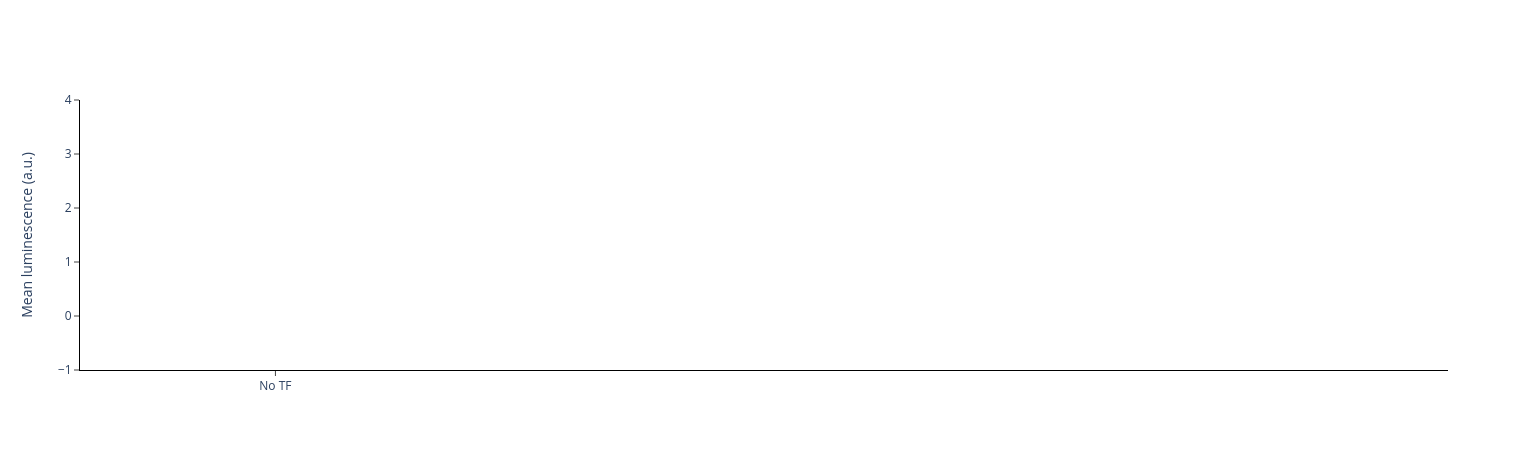

In [114]:
#layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)' )
fig = go.Figure(go.Violin(y=luminescence_raw_df[luminescence_raw_df.Promoter == 'ANR1'].corrected_luminescence, x=luminescence_raw_df[luminescence_raw_df.Promoter == 'ANR1'].TF_added,
                          fillcolor='#840122', box_visible=True, meanline_visible=True))
              #points="all"

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside", title_text='Mean luminescence (a.u.)')
#write to file static image and interactive one
#fig.write_image(f'../../../../data/plots/luminescence/{date}/violin23.9.19.pdf')
#fig.write_html(f'../../../../data/plots/luminescence/{date}/violin23.9.19.html')

fig.show()

### test normality

In [115]:
#returns test statistic, p-value
for name1 in prom_names:
    for name in names:
        print(name1,'{}: {}'.format(name, stats.shapiro(luminescence_raw_df['nluc/fluc'][luminescence_raw_df.TF_added == name])))


NOS No TF: (0.5556818246841431, 1.2103910306229123e-19)
NOS +NLP6: (0.9098576307296753, 0.4354603886604309)
STAP4 No TF: (0.5556818246841431, 1.2103910306229123e-19)
STAP4 +NLP6: (0.9098576307296753, 0.4354603886604309)
ANAC032 No TF: (0.5556818246841431, 1.2103910306229123e-19)
ANAC032 +NLP6: (0.9098576307296753, 0.4354603886604309)
ANR1 No TF: (0.5556818246841431, 1.2103910306229123e-19)
ANR1 +NLP6: (0.9098576307296753, 0.4354603886604309)
ARF18 No TF: (0.5556818246841431, 1.2103910306229123e-19)
ARF18 +NLP6: (0.9098576307296753, 0.4354603886604309)
NLP6 No TF: (0.5556818246841431, 1.2103910306229123e-19)
NLP6 +NLP6: (0.9098576307296753, 0.4354603886604309)
NLP7 No TF: (0.5556818246841431, 1.2103910306229123e-19)
NLP7 +NLP6: (0.9098576307296753, 0.4354603886604309)
DREB26 No TF: (0.5556818246841431, 1.2103910306229123e-19)
DREB26 +NLP6: (0.9098576307296753, 0.4354603886604309)
NIR1 No TF: (0.5556818246841431, 1.2103910306229123e-19)
NIR1 +NLP6: (0.9098576307296753, 0.4354603886604309

#### not normal

In [116]:
#test variance
stats.levene(luminescence_raw_df['nluc/fluc'][luminescence_raw_df.TF_added == names[0]], 
               luminescence_raw_df['nluc/fluc'][luminescence_raw_df.TF_added == names[1]])

LeveneResult(statistic=0.8521681258138821, pvalue=0.35735623050205645)

In [117]:
test = luminescence_raw_df.groupby('Promoter')

In [118]:
test

# one-way ANOVA: scipy.stats.kruskal

In [37]:
for name in names:
    print(name)

DREB26
ARF18
DREB26+ARF18
ANR1
NLP7
ANAC032
NLP6
NLP6+NLP7+DREB26
None
NLP6+NLP7


In [38]:
#luminescence anova
for promoter, value in test:
    if promoter == 'ANAC032':
        print(promoter)     
        print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],
                value['corrected_luminescence'][value.TF_added == 'DREB26'],
                value['corrected_luminescence'][value.TF_added == 'ARF18'],
                value['corrected_luminescence'][value.TF_added == 'DREB26+ARF18']))
    if promoter == 'ANR1':
        print(promoter)     
        print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],
                value['corrected_luminescence'][value.TF_added == 'ANR1'],
                value['corrected_luminescence'][value.TF_added == 'NLP7'],
                value['corrected_luminescence'][value.TF_added == 'ARF18'],
                value['corrected_luminescence'][value.TF_added == 'DREB26']))
    if promoter == 'ARF18':
        print(promoter)     
        print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],
                value['corrected_luminescence'][value.TF_added == 'NLP7'],
                value['corrected_luminescence'][value.TF_added == 'DREB26']))
    if promoter == 'NLP6':
        print(promoter)     
        print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],
                value['corrected_luminescence'][value.TF_added == 'ANR1'],                
                value['corrected_luminescence'][value.TF_added == 'ARF18'],
                value['corrected_luminescence'][value.TF_added == 'DREB26']))
    if promoter == 'DREB26':
        print(promoter)     
        print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],                
                value['corrected_luminescence'][value.TF_added == 'ARF18'],
               ))
    if promoter == 'NLP7':
        print(promoter)     
        print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],
                value['corrected_luminescence'][value.TF_added == 'ANR1'],
                value['corrected_luminescence'][value.TF_added == 'NLP7'],                
                value['corrected_luminescence'][value.TF_added == 'DREB26'],
                value['corrected_luminescence'][value.TF_added == 'ANAC032'],))
    
    if promoter == 'NIR1':
            
            print(promoter)     
            print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],
                value['corrected_luminescence'][value.TF_added == 'NLP6+NLP7'],
                value['corrected_luminescence'][value.TF_added == 'NLP7'],                
                value['corrected_luminescence'][value.TF_added == 'DREB26'],
                value['corrected_luminescence'][value.TF_added == 'NLP6+NLP7+DREB26'],
                value['corrected_luminescence'][value.TF_added == 'NLP6']))        


ANAC032
F_onewayResult(statistic=1.459094809213278, pvalue=0.2609663589015414)
ANR1
F_onewayResult(statistic=2.459714842186584, pvalue=0.07542115445345006)
ARF18
F_onewayResult(statistic=0.20316287920145232, pvalue=0.8191398039754546)
NLP6
F_onewayResult(statistic=2.362286745022707, pvalue=0.11229098218178363)
NLP7
F_onewayResult(statistic=2.7425083451994947, pvalue=0.05441545659443926)
DREB26
F_onewayResult(statistic=0.02207900481181436, pvalue=0.8860670927413211)
NIR1
F_onewayResult(statistic=8.855089713283736, pvalue=7.170274587213943e-05)


In [39]:
df = luminescence_raw_df
#First rerun NIR1 it as a GLM
NIR1 = df[df.Promoter == 'NIR1']  
results = ols('corrected_luminescence ~ C(TF_added)', data=NIR1).fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     corrected_luminescence   R-squared:                       0.648
Model:                                OLS   Adj. R-squared:                  0.575
Method:                     Least Squares   F-statistic:                     8.855
Date:                    Wed, 20 May 2020   Prob (F-statistic):           7.17e-05
Time:                            09:39:12   Log-Likelihood:                -102.70
No. Observations:                      30   AIC:                             217.4
Df Residuals:                          24   BIC:                             225.8
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.7863      3.388      0.232      0.818      -6.205       7.778
C(TF_added)[T.NLP6]                12.7791      4.791      2.667      0.013       2.891      22.667
C(TF_added)[T.NLP6+NLP7]           29.9190      5.867      5.099      0.000      17.809      42.029
C(TF_added)[T.NLP6+NLP7+DREB26]    19.3392      4.791      4.037      0.000       9.452      29.227
C(TF_added)[T.NLP7]                21.7526      4.791      4.541      0.000      11.865      31.640
C(TF_added)[T.None]                 0.1783      5.867      0.030      0.976     -11.932      12.288
==============================================================================
Omnibus:                        5.869   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                4.115
Skew:                           0.779   Prob(JB):                        0.128
Kurtosis:                       3.931   Cond. No.                         6.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# #make anova table for NIR1
# aov_table = sm.stats.anova_lm(results, typ=2)
# aov_table

In [41]:
# #pairwise tukey posthoc test for NIR1

    
# mc = MultiComparison(NIR1['corrected_luminescence'], NIR1['TF_added'])
# mc_results = mc.tukeyhsd()
# print(mc_results)

In [42]:
rp.summary_cont(NIR1['corrected_luminescence'].groupby(NIR1['TF_added']))

,N,Mean,SD,SE,95% Conf.,Interval
TF_added,,,,,,
DREB26,6,0.786273,0.192252,0.078487,0.617757,0.954790
NLP6,6,13.565373,5.492719,2.242393,8.750792,18.379953
NLP6+NLP7,3,30.705230,14.565166,8.409202,10.518940,50.891519
NLP6+NLP7+DREB26,6,20.125448,10.267389,4.191644,11.125685,29.125212
NLP7,6,22.538907,10.482721,4.279553,13.350397,31.727418
None,3,0.964554,0.570550,0.329407,0.173812,1.755295


In [43]:
ANR1 = df[df.Promoter == 'ANR1']
rp.summary_cont(ANR1['corrected_luminescence'].groupby(ANR1['TF_added']))


,N,Mean,SD,SE,95% Conf.,Interval
TF_added,,,,,,
ANR1,6,1.955531,0.707904,0.289001,1.335026,2.576037
ARF18,6,2.706486,0.950823,0.388172,1.873053,3.539919
DREB26,6,8.057981,8.582507,3.503794,0.535082,15.580881
NLP7,6,1.410340,0.568385,0.232042,0.912129,1.908551
None,3,2.956155,1.171409,0.676313,1.332665,4.579645


In [44]:
for promoter, value in test:
    print('\033[1m' +promoter + '\033[0m')
    print(kruskal(data=df[df.Promoter == promoter], dv='corrected_luminescence', between='TF_added'))
    print('')

NOS
           Source  ddof1    H
Kruskal  TF_added      0  0.0

STAP4
           Source  ddof1    H
Kruskal  TF_added      0  0.0

ANAC032
           Source  ddof1         H     p-unc
Kruskal  TF_added      3  2.424242  0.489138

ANR1
           Source  ddof1          H     p-unc
Kruskal  TF_added      4  14.875661  0.004966

ARF18
           Source  ddof1         H     p-unc
Kruskal  TF_added      2  0.297143  0.861938

NLP6
           Source  ddof1         H    p-unc
Kruskal  TF_added      3  5.814737  0.12098

NLP7
           Source  ddof1         H     p-unc
Kruskal  TF_added      4  9.275132  0.054579

DREB26
           Source  ddof1         H     p-unc
Kruskal  TF_added      1  0.066667  0.796253

NIR1
           Source  ddof1          H     p-unc
Kruskal  TF_added      5  20.823656  0.000875



In [45]:
#run Dunn's post-hoc test
#ANR1
sp.posthoc_dunn(df[df.Promoter == 'ANR1'], val_col='corrected_luminescence', group_col='TF_added', p_adjust='bonferroni')

,ANR1,ARF18,DREB26,NLP7,None
ANR1,-1.000000,1.000000,0.071163,1.000000,1.000000
ARF18,1.000000,-1.000000,1.000000,0.454646,1.000000
DREB26,0.071163,1.000000,-1.000000,0.003175,1.000000
NLP7,1.000000,0.454646,0.003175,-1.000000,0.535796
None,1.000000,1.000000,1.000000,0.535796,-1.000000


In [46]:
#NIR1 post-hoc test
sp.posthoc_dunn(df[df.Promoter == 'NIR1'], val_col='corrected_luminescence', group_col='TF_added', p_adjust='bonferroni')

,DREB26,NLP6,NLP6+NLP7,NLP6+NLP7+DREB26,NLP7,None
DREB26,-1.000000,0.537726,0.021630,0.052771,0.017535,1.000000
NLP6,0.537726,-1.000000,1.000000,1.000000,1.000000,1.000000
NLP6+NLP7,0.021630,1.000000,-1.000000,1.000000,1.000000,0.070083
NLP6+NLP7+DREB26,0.052771,1.000000,1.000000,-1.000000,1.000000,0.206551
NLP7,0.017535,1.000000,1.000000,1.000000,-1.000000,0.094729
None,1.000000,1.000000,0.070083,0.206551,0.094729,-1.000000
